Trabalho desenvolvido por Iara Leodoro e Giovani Santos Silva

1º instalação das bibliotecas necessárias para treinamento do classificador

In [ ]:
!pip install kaggle
!pip install tensorflow
!pip install Pillow
!pip install matplotlib
!pip install seaborn

2º Passando o arquivo de permissão de api do kaggle para download do dataset e extração

In [ ]:
import os

os.makedirs('.kaggle', exist_ok=True)
os.rename('kaggle.json', '.kaggle/kaggle.json')
os.chmod('.kaggle/kaggle.json', 0o600)

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = os.path.abspath('.kaggle')

In [ ]:
!kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100%|███████████████████████████████████████▉| 963M/964M [02:53<00:00, 6.52MB/s]
100%|████████████████████████████████████████| 964M/964M [02:53<00:00, 5.83MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('fruits.zip', 'r') as zip_ref:
    zip_ref.extractall('fruits')

3º Escalamento e dividisão do conjunto de dados em treinamento e validação e também rescale das imagens para processo de treinamento

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    'fruits/fruits-360_dataset_original-size/fruits-360-original-size/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    'fruits/fruits-360_dataset_original-size/fruits-360-original-size/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


2024-11-06 14:38:04.341764: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-06 14:38:04.350507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730914684.360126  240475 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730914684.363056  240475 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 14:38:04.373333: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.


4º Configurando modelos de rede MobileNetV2 e ResNet50 como modelos pré-treinados

In [8]:
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Modelo MobileNetV2
base_model_1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_1.trainable = False

model_1 = Sequential([
    base_model_1,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelo ResNet50
base_model_2 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_2.trainable = False

model_2 = Sequential([
    base_model_2,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


5º Treinamento dos modelos

In [10]:
# Treinamento do modelo MobileNetV2
history_1 = model_1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Treinamento do modelo ResNet50
history_2 = model_2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10


/home/iara/.virtualenvs/pos-graduação/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 66s 327ms/step - accuracy: 0.7697 - loss: 0.9298 - val_accuracy: 1.0000 - val_loss: 0.0208
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 61s 315ms/step - accuracy: 0.9997 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 310ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 307ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 306ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 306ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 8.9546e-04
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 631ms/step - accuracy: 1.0000 - loss: 7.9032e-04 - val_accuracy: 1.0000 - val_loss: 6.2806e-04
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 710ms/step - accuracy: 1.0000 - loss

In [11]:
import os

model_output_dir = "saved_models"
if not os.path.exists(model_output_dir):
    os.makedirs(model_output_dir)

# Salvar o modelo MobileNetV2
mobilenetv2_model_path = os.path.join(model_output_dir, "MobileNetV2_trained_model.h5")
model_1.save(mobilenetv2_model_path)
print(f"Modelo MobileNetV2 salvo em: {mobilenetv2_model_path}")

# Salvar o modelo ResNet50
resnet50_model_path = os.path.join(model_output_dir, "ResNet50_trained_model.h5")
model_2.save(resnet50_model_path)
print(f"Modelo ResNet50 salvo em: {resnet50_model_path}")


Modelo MobileNetV2 salvo em: saved_models/MobileNetV2_trained_model.h5
Modelo ResNet50 salvo em: saved_models/ResNet50_trained_model.h5


6º Vizualização de métricas dos modelos treinados

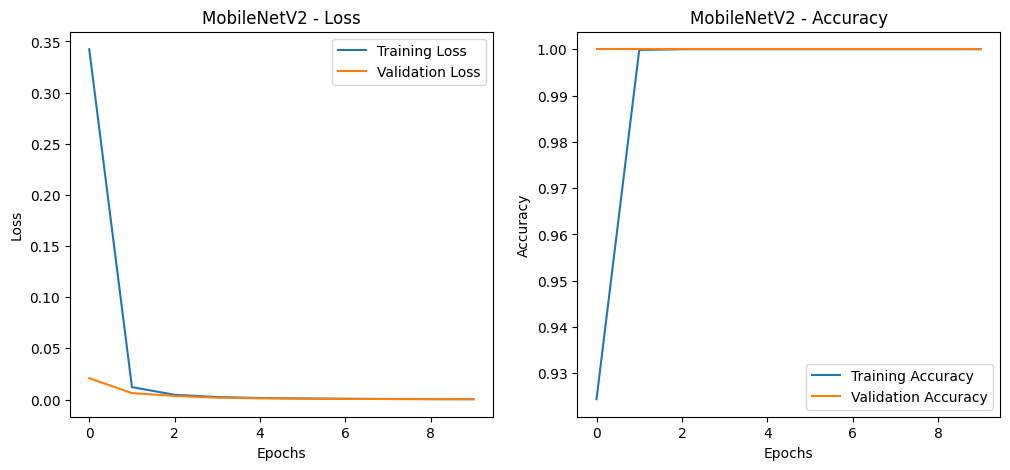

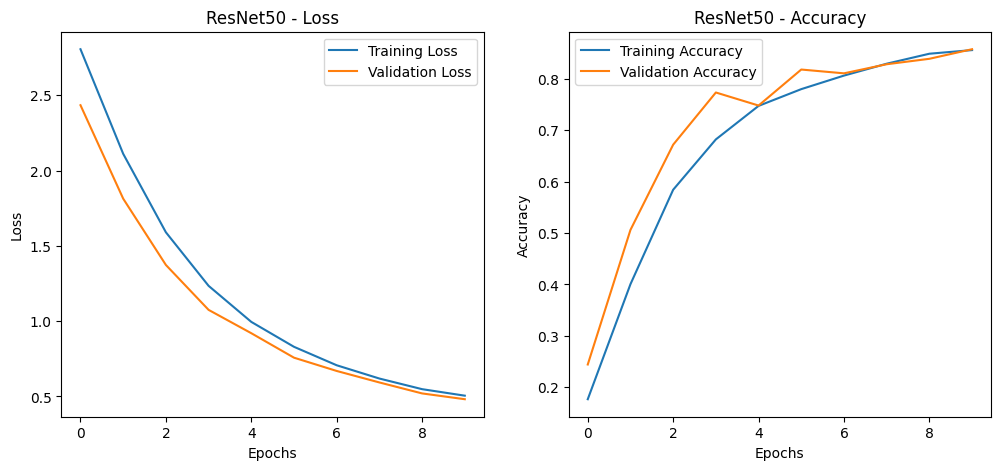

In [19]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history_1, "MobileNetV2")
plot_history(history_2, "ResNet50")


98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step
Matriz de Confusão para MobileNetV2:


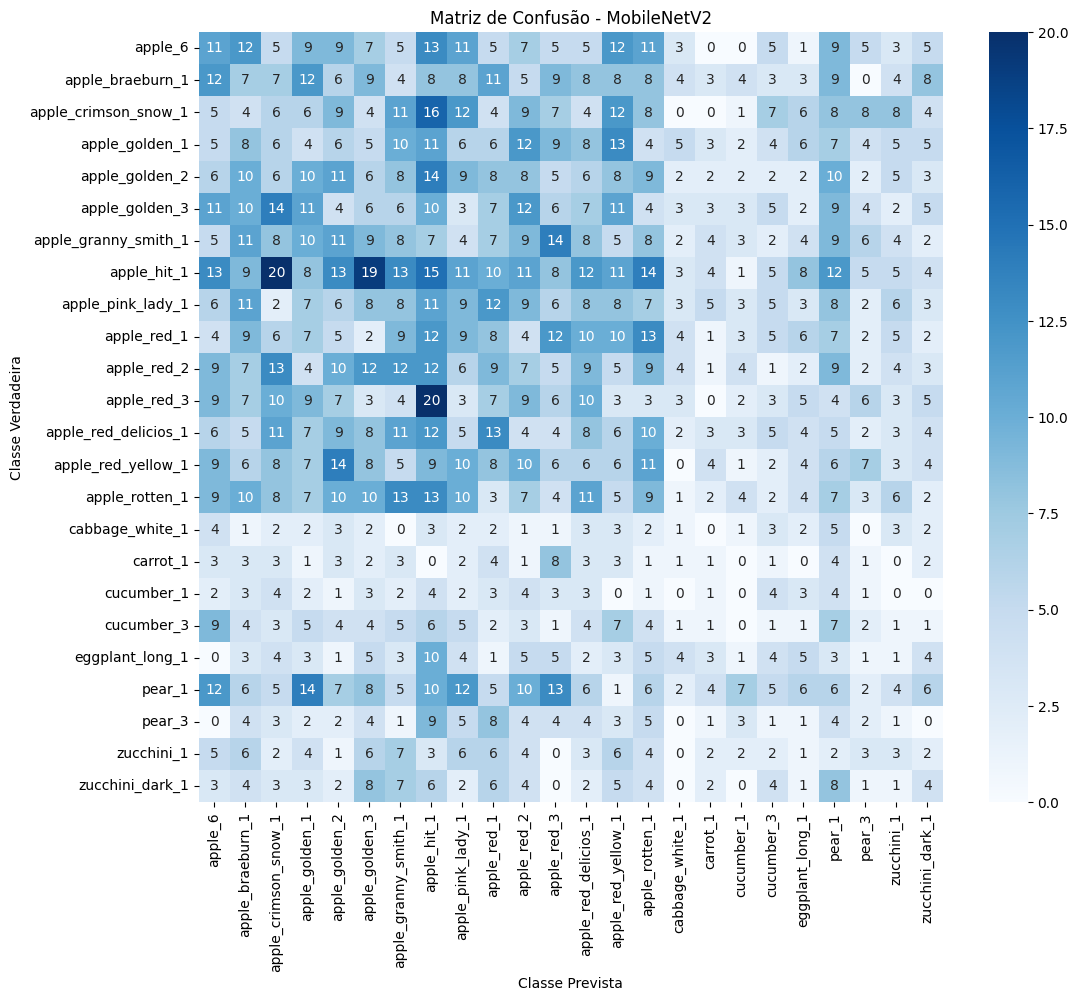

98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 701ms/step
Matriz de Confusão para ResNet50:


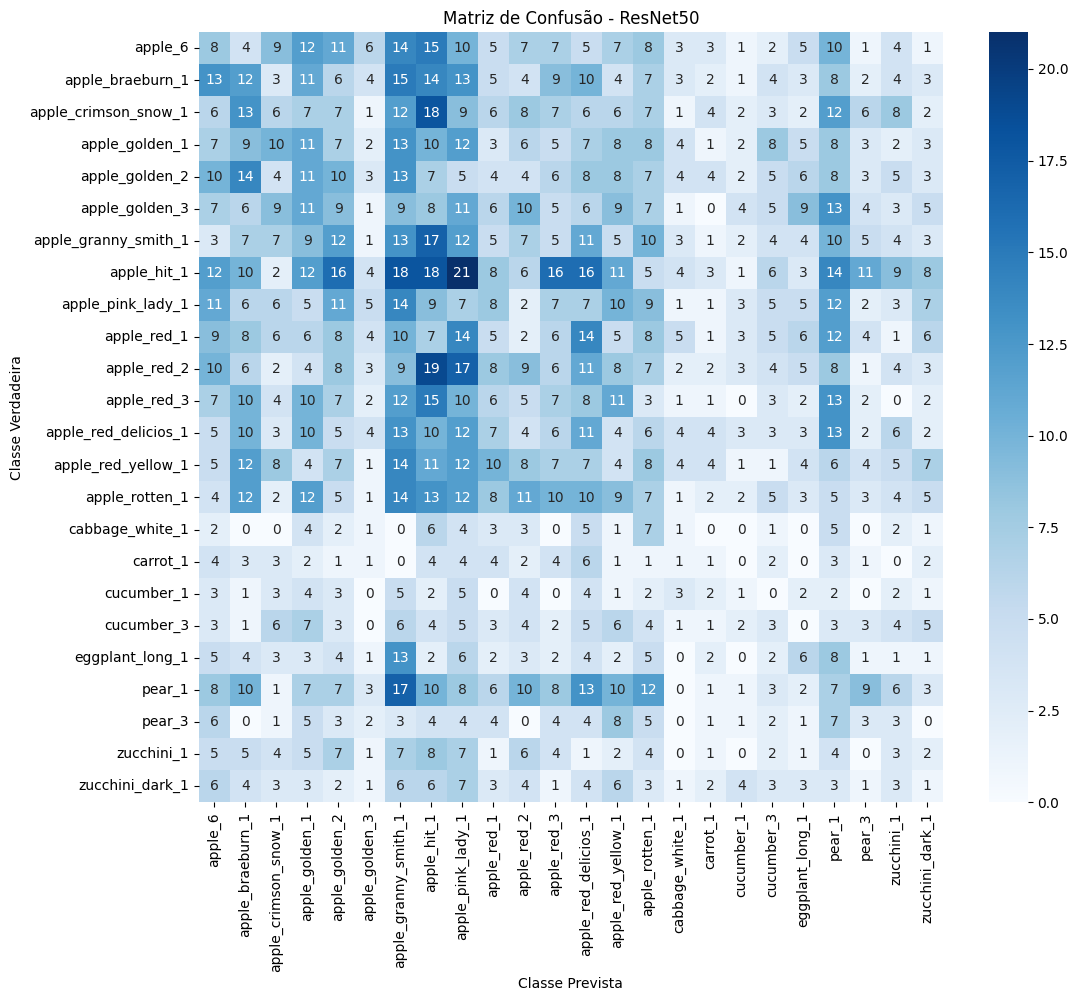

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Classe Prevista")
    plt.ylabel("Classe Verdadeira")
    plt.show()

val_labels = validation_generator.classes
class_names = list(validation_generator.class_indices.keys())  

val_preds_1 = np.argmax(model_1.predict(validation_generator), axis=-1)
print("Matriz de Confusão para MobileNetV2:")
plot_confusion_matrix(val_labels, val_preds_1, class_names, "MobileNetV2")

val_preds_2 = np.argmax(model_2.predict(validation_generator), axis=-1)
print("Matriz de Confusão para ResNet50:")
plot_confusion_matrix(val_labels, val_preds_2, class_names, "ResNet50")
